In [1]:
!git clone https://github.com/alifele/Physionet_ECG_competition.git

Cloning into 'Physionet_ECG_competition'...
remote: Enumerating objects: 43, done.
remote: Counting objects: 100% (43/43), done.
remote: Compressing objects: 100% (37/37), done.
remote: Total 43 (delta 13), reused 25 (delta 4), pack-reused 0
Unpacking objects: 100% (43/43), done.


In [0]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import io
import sys

In [0]:
sys.path.append('/content/Physionet_ECG_competition/library')

In [4]:
%run /content/Physionet_ECG_competition/library/DataLoad.ipynb

--2020-05-22 11:30:44--  https://cloudypipeline.com:9555/api/download/physionet2020training/PhysioNetChallenge2020_Training_CPSC.tar.gz/
Resolving cloudypipeline.com (cloudypipeline.com)... 34.74.104.185
Connecting to cloudypipeline.com (cloudypipeline.com)|34.74.104.185|:9555... connected.
HTTP request sent, awaiting response... 200 
Length: 859926186 (820M) [application/octet-stream]
Saving to: ‘PhysioNetChallenge2020_Training_CPSC.tar.gz’

PhysioNetChallenge2 100%[===================>] 820.09M  29.6MB/s    in 28s     

2020-05-22 11:31:12 (29.0 MB/s) - ‘PhysioNetChallenge2020_Training_CPSC.tar.gz’ saved [859926186/859926186]



In [0]:
import data_fetch as df

In [0]:
data = df.data_loader("A0584.mat")

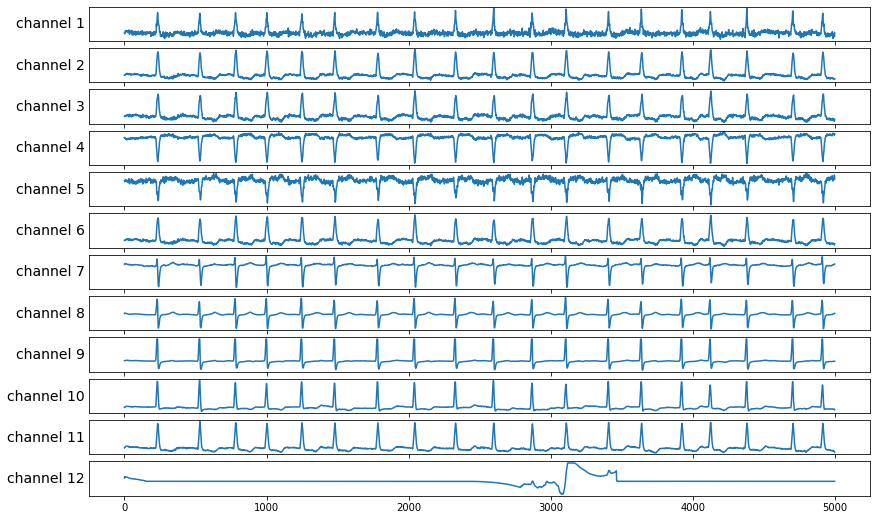

In [7]:
fig = plt.figure(figsize=(14,9))

for i in range(12):
  ax = fig.add_subplot(12,1,i+1)
  ax.plot(data[:,i])
  ax.set_yticks([])
  ax.set_ylabel('channel {}'.format(i+1), rotation=0, fontsize=14, ha = 'right', va='center')

In [0]:
info_encoded = df.Get_Info('A6349.hea')

In [9]:
info_encoded

[47, 0, 5]

In [10]:
info_decoded = df.Get_Info("A6349.hea", encoded=False)
info_decoded

('47', '#Sex: Female\n', '#Dx: PVC\n')

In [11]:
df.disease_decoder(info_encoded[2])

'PVC'

In [12]:
df.sex_decoder(info_encoded[1])

'Female'

## Batch load

In [0]:
subjs = ['A6584', 'A6356', 'A1847']

In [0]:
data, info = df.batch_loader(subjs)

In [16]:
data[2].shape

(7500, 12)

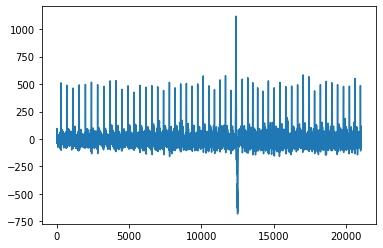

In [17]:
plt.plot(data[1][:,5])